In [1]:
import pandas as pd
import os
import json

## 1 - Load the training data

In [2]:
file_path = os.path.join('..', 'data', 'cleaned')

train_df = pd.read_csv(os.path.join(file_path, 'train.csv'), low_memory=False)
train_df.head()

,file,VMONTH,VYEAR,VDAYR,YEAR,AGE,SEX,ETHNIC,RACE,USETOBAC,...,PHYSASST,NPNMW,RNLPN,OTHPROV,MHP,NODISP,REFOTHMD,RETAPPT,OTHDISP,ERADMHOS
0,opd2006.csv,December,2006.0,Friday,2006.0,55.0,Male,Not Hispanic or Latino,White Only,Not current,...,No,No,No,No,NaN,One or more dispositions marked,No,No,No,No
1,opd2006.csv,November,2006.0,Thursday,2006.0,66.0,Male,Not Hispanic or Latino,White Only,Not current,...,No,No,No,No,NaN,One or more dispositions marked,No,No,No,No
2,opd2006.csv,November,2006.0,Wednesday,2006.0,71.0,Female,Not Hispanic or Latino,White Only,Not current,...,No,No,No,No,NaN,One or more dispositions marked,Yes,No,No,No
3,opd2006.csv,November,2006.0,Tuesday,2006.0,1.0,Female,Not Hispanic or Latino,White Only,Not current,...,No,No,No,No,NaN,One or more dispositions marked,No,No,No,No
4,opd2006.csv,November,2006.0,Monday,2006.0,21.0,Female,Not Hispanic or Latino,White Only,Current,...,No,No,No,No,NaN,One or more dispositions marked,No,No,No,No


## 2 - Load the vairiables dictionary and define features for clustering

In [3]:
# Load the variables dictionary
with open(os.path.join(file_path, 'variables.json'), 'r') as f:
    variables = json.load(f)

print(f'Variable Categories:\n')
for category, list in variables.items():
    print(f'{category}')
    print(f'{list}')

Variable Categories:

dateOfVisit
['VMONTH', 'VYEAR', 'VDAYR', 'YEAR']
demographics
['AGE', 'SEX', 'ETHNIC', 'RACE', 'USETOBAC']
payment
['PAYPRIV', 'PAYMCARE', 'PAYMCAID', 'PAYWKCMP', 'PAYSELF', 'PAYNOCHG', 'PAYOTH', 'PAYDK', 'PAYTYPER']
visitReason
['INJDET', 'INJURY', 'MAJOR', 'RFV1', 'RFV2', 'RFV3']
patientClinicHistory
['SENBEFOR', 'PASTVIS']
vitalSigns
['HTIN', 'WTLB', 'BMI', 'TEMPF', 'BPSYS', 'BPDIAS']
imputedFields
['BDATEFL', 'SEXFL', 'SENBEFL', 'PASTFL']
physicianDiagnoses
['DIAG1', 'DIAG2', 'DIAG3']
differentialDiagnoses
['PRDIAG1', 'PRDIAG2', 'PRDIAG3']
presentSymptomsStatus
['ARTHRTIS', 'ASTHMA', 'CANCER', 'CASTAGE', 'CEBVD', 'CHF', 'CRF', 'COPD', 'DEPRN', 'DIABETES', 'HYPLIPID', 'HTN', 'IHD', 'OBESITY', 'OSTPRSIS', 'NOCHRON', 'TOTCHRON', 'DMP']
services
['BREAST', 'PELVIC', 'RECTAL', 'SKIN', 'DEPRESS', 'BONEDENS', 'MAMMO', 'MRI', 'ULTRASND', 'XRAY', 'OTHIMAGE', 'CBC', 'ELECTROL', 'GLUCOSE', 'HGBA', 'CHOLEST', 'PSA', 'OTHERBLD', 'BIOPSY', 'CHLAMYD', 'PAPCONV', 'PAPLIQ', 'P


### 2.1 Defining features for clustering

##### !!! The statistical test result of the features should be referred first

In [4]:
train_df[variables['visitReason']].value_counts()

INJDET                          INJURY  MAJOR                                 RFV1                               RFV2                                     RFV3                                    
None of the above               No      Chronic problem, routine              Progress visit, NOS                Psychotherapy                            Medication, other and unspecified kinds     43
                                                                              Diabetes mellitus                  Hypertension                             Other endocrine, nutritional, and met...    29
Unintentional injury/poisoning  Yes     Chronic problem, routine              Alcoholism                         Progress visit, NOS                      Psychotherapy                               25
None of the above               No      Chronic problem, routine              Progress visit, NOS                Psychotherapy                            Group counseling                            23
 

In [5]:
# Defining the independent variables as features for clustering
features = \
    ['AGE', 'SEX'] + variables['visitReason'] + ['PASTVIS'] + variables['vitalSigns'] \
    + [item for item in variables['presentSymptomsStatus'] if item not in ['NOCHRON', 'TOTCHRON']]

print(f'Features: {features}')
print(f'Number of Features: {len(features)}')

Features: ['AGE', 'SEX', 'INJDET', 'INJURY', 'MAJOR', 'RFV1', 'RFV2', 'RFV3', 'PASTVIS', 'HTIN', 'WTLB', 'BMI', 'TEMPF', 'BPSYS', 'BPDIAS', 'ARTHRTIS', 'ASTHMA', 'CANCER', 'CASTAGE', 'CEBVD', 'CHF', 'CRF', 'COPD', 'DEPRN', 'DIABETES', 'HYPLIPID', 'HTN', 'IHD', 'OBESITY', 'OSTPRSIS', 'DMP']
Number of Features: 31


In [6]:
clustering_df = train_df.loc[:, features]

## 3 - Preprocess and engineer the features

### 3.1 - Bin/Normalize quantitative features
Need to try out results with Binning

In [7]:
from sklearn.preprocessing import StandardScaler

#### 3.1.1 - Binning

#### 3.1.2 - Normalization

In [8]:
# Get a list of quantitative features
quantitative_features = [feature for feature in features if clustering_df[feature].dtype != 'object']

# Normalize quantitative features
scaler = StandardScaler()
clustering_df[quantitative_features] = scaler.fit_transform(clustering_df[quantitative_features])

# Check the result
clustering_df[quantitative_features].head()

,AGE,PASTVIS,HTIN,WTLB,BMI,TEMPF,BPSYS,BPDIAS
0,0.710117,-0.016688,0.530558,1.762024,1.904835,-0.230443,1.800628,1.390837
1,1.177478,-0.389377,0.609827,0.586196,0.243487,-0.533710,-0.678966,-0.880536
2,1.389914,0.281463,-0.103596,0.329405,0.924274,-1.342420,1.304709,-0.231572
3,-1.584197,-0.389377,-1.926787,-1.670855,NaN,0.881535,NaN,NaN
4,-0.734451,0.281463,0.372019,-0.035507,-0.310296,-0.230443,-0.678966,-1.042777


### 3.2 - Dimensionality reduction for quantitative features

### 3.3 - Encode categorical features

In [9]:
# Get a list of categorical features
categorical_features = [feature for feature in features if feature not in quantitative_features]

# One-hot encode categorical features
clustering_df = pd.get_dummies(clustering_df, columns=categorical_features, drop_first=True)

# Get the list of encoded features
encoded_features = [feature for feature in clustering_df.columns if feature not in quantitative_features + categorical_features]

# Check the result
clustering_df[encoded_features].head()

,SEX_Male,INJDET_Adverse effect of med care/surg care/medicinal drug,INJDET_Injury/poisoning - unknown intent,INJDET_Intentional injury/poisoning,INJDET_None of the above,INJDET_Unintentional injury/poisoning,INJURY_Yes,"MAJOR_Chronic problem, flare-up","MAJOR_Chronic problem, routine",MAJOR_New problem (less than 3 mos. onset),...,DEPRN_Yes,DIABETES_Yes,HYPLIPID_Yes,HTN_Yes,IHD_Yes,OBESITY_Yes,OSTPRSIS_Yes,DMP_Not applicable,DMP_Not enrolled,DMP_Ordered/advised to enroll at this visit
0,True,False,False,False,False,True,True,False,False,False,...,False,True,True,False,False,True,False,False,False,False
1,True,False,False,False,True,False,False,False,False,False,...,False,False,True,True,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,False,True,True,True,False,True,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False


### 3.4 - Dimensionality reduction for categorical features

### 3.5 - Redefine the clusterring DataFrame for training

In [10]:
# Redefine the clustering DataFrame
clustering_df = clustering_df.loc[:, quantitative_features + encoded_features]

## 4 - Baseline clustering model

### 4.1 - Train models

#### 4.1.1 - KMeans

In [11]:
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [12]:
random_seed = 42

In [13]:
# Impute the missing quantitative values using KNN
n_neighbors = 5
imputer = KNNImputer(n_neighbors=n_neighbors)

clustering_df_imputed = imputer.fit_transform(clustering_df[quantitative_features])

In [14]:
# Concatenate the imputed quantitative features with the encoded categorical features
clustering_df_imputed = pd.concat([
    pd.DataFrame(clustering_df_imputed, columns=quantitative_features), 
    clustering_df[encoded_features]
], axis=1)

In [15]:
# Clustering using KMeans
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=random_seed)
train_df['cluster'] = kmeans.fit_predict(clustering_df_imputed)

# Check the result
train_df['cluster'].value_counts()

cluster
5    22533
7    16102
6    12755
1    12475
0     9290
8     9068
9     7240
4     6520
2     4980
3     2523
Name: count, dtype: int64

### 4.2 - Evaluation of the model

In [16]:
import altair as alt
import vegafusion as vf
alt.data_transformers.enable("vegafusion")

DataTransformerRegistry.enable('vegafusion')

#### 4.2.1 - Metrics

In [17]:
# Calculate the Silhouette Score
silhouette = silhouette_score(clustering_df_imputed, train_df['cluster'])
print(f'Silhouette Score: {silhouette}')

Silhouette Score: 0.060936523975194855


In [18]:
# Calculate the sum of squared distances of samples to their closest cluster center
print(f'Sum of Squared Distances: {kmeans.inertia_}')

Sum of Squared Distances: 617995.8133063597


#### 4.2.2 - Examine cluster centroids

In [19]:
# Check the cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=clustering_df_imputed.columns)

# Inverse transform the cluster centers
cluster_centers[quantitative_features] = scaler.inverse_transform(cluster_centers[quantitative_features])

# Check the result
cluster_centers

,AGE,PASTVIS,HTIN,WTLB,BMI,TEMPF,BPSYS,BPDIAS,SEX_Male,INJDET_Adverse effect of med care/surg care/medicinal drug,...,DEPRN_Yes,DIABETES_Yes,HYPLIPID_Yes,HTN_Yes,IHD_Yes,OBESITY_Yes,OSTPRSIS_Yes,DMP_Not applicable,DMP_Not enrolled,DMP_Ordered/advised to enroll at this visit
0,61.932285,4.606384,65.757950,170.538163,27.714171,97.674985,114.523307,64.730757,0.389601,6.566907e-03,...,0.156529,0.239746,0.198514,0.383895,0.075035,0.063408,0.043923,0.139843,0.186349,0.015072
1,27.161657,3.723956,64.750244,167.186359,27.660375,98.067717,111.619187,66.025775,0.054821,7.213272e-04,...,0.048489,0.040474,0.004969,0.019396,0.000882,0.049291,0.001603,0.774786,0.050974,0.007534
2,3.173092,3.110803,35.302450,32.738916,17.820432,99.294253,103.078153,61.177028,0.533333,2.610442e-03,...,0.004217,0.003614,0.000402,0.002209,0.002209,0.009036,0.000402,0.848795,0.035944,0.002610
3,46.540626,37.039715,65.728339,177.417915,28.460954,97.875997,126.118827,74.620055,0.464923,-2.125036e-17,...,0.308759,0.122077,0.052715,0.191835,0.028537,0.070155,0.014665,0.324217,0.085216,0.004360
4,52.476074,3.065322,66.508497,194.332883,30.772685,97.936666,156.592178,92.716779,0.447546,5.061350e-03,...,0.109202,0.193865,0.158896,0.561810,0.039417,0.105828,0.017485,0.200153,0.184816,0.019479
5,40.084191,2.849365,66.451758,186.220016,29.253656,98.041448,125.358051,78.008140,0.436845,3.905557e-03,...,0.140644,0.051571,0.027960,0.075493,0.004039,0.036082,0.003506,0.586055,0.059427,0.011939
6,17.968169,3.091595,62.023599,119.741090,21.493248,98.027265,110.873697,66.059004,0.430498,3.136025e-03,...,0.092591,0.025951,0.005958,0.015837,0.001333,0.023834,0.000941,0.678871,0.066719,0.007605
7,67.058129,3.838616,65.598895,174.991628,28.534663,97.718200,138.186362,75.363657,0.388026,3.788349e-03,...,0.135387,0.272140,0.229909,0.522171,0.065955,0.056515,0.050677,0.119675,0.163210,0.010247
8,3.050066,2.934715,35.598213,32.252933,17.013549,97.612667,99.243119,59.667005,0.541575,2.315836e-03,...,0.001875,0.003639,0.001213,0.003419,0.001985,0.010476,0.000331,0.835576,0.042347,0.002316
9,45.961464,3.513356,66.155497,271.742514,43.286694,97.944500,129.789503,76.972845,0.337845,4.419890e-03,...,0.151381,0.340193,0.195994,0.469475,0.039917,0.484669,0.011740,0.125552,0.182182,0.026105


#### 4.2.3 - Visualization

## 5 - Extract text features from each cluster

#### 5.1 - Aggregate text data by cluster

In [20]:
for i, (k, v) in zip (range(len(variables)), variables.items()):
    if i <= 5:
        print(k, v)

dateOfVisit ['VMONTH', 'VYEAR', 'VDAYR', 'YEAR']
demographics ['AGE', 'SEX', 'ETHNIC', 'RACE', 'USETOBAC']
payment ['PAYPRIV', 'PAYMCARE', 'PAYMCAID', 'PAYWKCMP', 'PAYSELF', 'PAYNOCHG', 'PAYOTH', 'PAYDK', 'PAYTYPER']
visitReason ['INJDET', 'INJURY', 'MAJOR', 'RFV1', 'RFV2', 'RFV3']
patientClinicHistory ['SENBEFOR', 'PASTVIS']
vitalSigns ['HTIN', 'WTLB', 'BMI', 'TEMPF', 'BPSYS', 'BPDIAS']


In [21]:
for i, (k, v) in zip (range(len(variables)), variables.items()):
    if i > 5 and i <= 10:
        print(k, v)

imputedFields ['BDATEFL', 'SEXFL', 'SENBEFL', 'PASTFL']
physicianDiagnoses ['DIAG1', 'DIAG2', 'DIAG3']
differentialDiagnoses ['PRDIAG1', 'PRDIAG2', 'PRDIAG3']
presentSymptomsStatus ['ARTHRTIS', 'ASTHMA', 'CANCER', 'CASTAGE', 'CEBVD', 'CHF', 'CRF', 'COPD', 'DEPRN', 'DIABETES', 'HYPLIPID', 'HTN', 'IHD', 'OBESITY', 'OSTPRSIS', 'NOCHRON', 'TOTCHRON', 'DMP']
services ['BREAST', 'PELVIC', 'RECTAL', 'SKIN', 'DEPRESS', 'BONEDENS', 'MAMMO', 'MRI', 'ULTRASND', 'XRAY', 'OTHIMAGE', 'CBC', 'ELECTROL', 'GLUCOSE', 'HGBA', 'CHOLEST', 'PSA', 'OTHERBLD', 'BIOPSY', 'CHLAMYD', 'PAPCONV', 'PAPLIQ', 'PAPUNSP', 'HPVDNA', 'EKG', 'SPIRO', 'URINE', 'HTTAKE', 'WTTAKE', 'TEMPTAKE', 'BLODPRES', 'CAM', 'DME', 'HOMEHLTH', 'HOSPICE', 'PT', 'RADTHER', 'SPOCTHER', 'PSYCHOTH', 'OTHMNTL', 'EXCISION', 'ORTHO', 'WOUND', 'ECHOCARD', 'OTHULTRA', 'PROC1', 'PROC2', 'PROC3', 'PROC4', 'PROC5', 'PROC6', 'PROC7', 'PROC8', 'PROC9', 'CATSCAN', 'PREGTEST', 'FOOT', 'RETINAL', 'HIVTEST', 'CAST', 'SPLINT']


In [22]:
train_df.USETOBAC.unique()

array(['Not current', 'Current', nan], dtype=object)

In [23]:
train_df[variables['visitReason']].head()

,INJDET,INJURY,MAJOR,RFV1,RFV2,RFV3
0,Unintentional injury/poisoning,Yes,Acute problem,"Injury, other and unspecified, of sho...",NaN,NaN
1,None of the above,No,Acute problem,Cough,NaN,NaN
2,None of the above,No,Acute problem,General ill feeling,Abnormal eye movements,NaN
3,None of the above,No,Acute problem,Other and unspecified symptoms refera...,NaN,NaN
4,None of the above,No,Acute problem,Throat soreness,Sinus problems,NaN


In [24]:
train_df[variables['physicianDiagnoses']].head()

,DIAG1,DIAG2,DIAG3
0,"Shoulder and upper arm injury, other ...",NaN,NaN
1,"Bronchitis, not specified as acute or...",NaN,NaN
2,Dizziness and giddiness,"Diabetes mellitus w/o complication, t...",Unspecified essential hypertension
3,Unspecified otitis media,Acute upper respiratory infections of...,Chronic rhinitis
4,Unspecified sinusitis (chronic),NaN,NaN


In [25]:
print(train_df.PRDIAG1.unique())
print()

train_df.DIAG1[train_df.PRDIAG1.str.contains('not probable') | (train_df.PRDIAG1 == 'No')].value_counts()

['No' 'Yes' 'Not applicable' 'Dx is not probable, questionable, ruleout'
 'No diagnosis entered' 'Dx is probable, questionable, or ruleout']



DIAG1
Supervision of other normal pregnancy       3754
Routine infant or child health check        3595
Diabetes mellitus w/o complication, t...    3162
Unspecified essential hypertension          2412
Routine gynecological examination           1496
                                            ... 
Unspecified drug dependence, episodic          1
Delayd/secondary postpartm hemorr pos...       1
Ulcer of esophagus without bleeding            1
Closed fracture of other part of hume...       1
Lacrimal fistula                               1
Name: count, Length: 4192, dtype: int64

In [26]:
train_df[variables['presentSymptomsStatus']].value_counts()

ARTHRTIS  ASTHMA  CANCER  CASTAGE   CEBVD  CHF  CRF  COPD  DEPRN  DIABETES  HYPLIPID  HTN  IHD  OBESITY  OSTPRSIS  NOCHRON  TOTCHRON  DMP               
No        No      Yes     Local     No     No   No   No    No     No        No        No   No   No       No        No       1.0       Not enrolled          152
                                                                                                                                      Currently enrolled    150
                          Distant   No     No   No   No    No     No        No        No   No   No       No        No       1.0       Currently enrolled     98
                          Regional  No     No   No   No    No     No        No        No   No   No       No        No       1.0       Currently enrolled     81
                          Distant   No     No   No   No    No     No        No        No   No   No       No        No       1.0       Not enrolled           76
                                               

In [46]:
# Combine `AGE` as integer
train_df['CombinedText'] = train_df['AGE'].apply(lambda value: ' '.join([str(int(value)), 'years old']) if pd.notna(value) else '')
# Combine `SEX`
train_df['CombinedText'] = train_df[['CombinedText', 'SEX']].apply(lambda row: ' '.join([row.iloc[0], row.iloc[-1]]) if isinstance(row.iloc[-1], str) else row.iloc[0], axis=1)
# Comine `USETOBAC` if the patient is a current tobacco user
train_df['CombinedText'] = train_df[['CombinedText', 'USETOBAC']].apply(lambda row: ' '.join([row.iloc[0], 'TOBACCO user']) if row.iloc[-1] == 'Current' else row.iloc[0], axis=1)

# Combine `visitReason` and rule out the non-relevant reasons
train_df['CombinedText'] = train_df[['CombinedText'] + variables['visitReason'][2:]].apply(
    lambda row: ' '.join([
        val for val in row if isinstance(val, str) and val not in [
            'Problems, complaints, NEC', 'Patient unable to speak English', 'Patient (or spokesperson) refused care', 'Entry of "none" or "no complaint"', 'Inadequate data base', 'Illegible entry'
        ]
    ]), axis=1
)

# Convert and combine `presentSymptomsStatus` and rule out 'NO' and 'NONE' symptoms
train_df['CombinedText'] = train_df[['CombinedText', 'ARTHRTIS']].apply(lambda row: ' '.join([row.iloc[0], 'Arthritis']) if row.iloc[-1] == 'Yes' else row.iloc[0], axis=1)
train_df['CombinedText'] = train_df[['CombinedText', 'ASTHMA']].apply(lambda row: ' '.join([row.iloc[0], 'Asthma']) if row.iloc[-1] == 'Yes' else row.iloc[0], axis=1)
train_df['CombinedText'] = train_df[['CombinedText', 'CASTAGE', 'CANCER']].apply(
    lambda row: ' '.join([row.iloc[0], row.iloc[1], 'Cancer']) if (row.iloc[-1] == 'Yes') & pd.notna(row.iloc[1])
                                                               else (' '.join([row.iloc[0], 'Cancer']) if row.iloc[-1] == 'Yes' else row.iloc[0]), axis=1
)
train_df['CombinedText'] = train_df[['CombinedText', 'CEBVD']].apply(lambda row: ' '.join([row.iloc[0], 'Cerebrovascular disease']) if row.iloc[-1] == 'Yes' else row.iloc[0], axis=1)
train_df['CombinedText'] = train_df[['CombinedText', 'CHF']].apply(lambda row: ' '.join([row.iloc[0], 'Congestive heart failure']) if row.iloc[-1] == 'Yes' else row.iloc[0], axis=1)
train_df['CombinedText'] = train_df[['CombinedText', 'CRF']].apply(lambda row: ' '.join([row.iloc[0], 'Chronic renal failure']) if row.iloc[-1] == 'Yes' else row.iloc[0], axis=1)
train_df['CombinedText'] = train_df[['CombinedText', 'COPD']].apply(lambda row: ' '.join([row.iloc[0], 'Chronic obstructive pulmonary disease']) if row.iloc[-1] == 'Yes' else row.iloc[0], axis=1)
train_df['CombinedText'] = train_df[['CombinedText', 'DEPRN']].apply(lambda row: ' '.join([row.iloc[0], 'Depression']) if row.iloc[-1] == 'Yes' else row.iloc[0], axis=1)
train_df['CombinedText'] = train_df[['CombinedText', 'DIABETES']].apply(lambda row: ' '.join([row.iloc[0], 'Diabetes']) if row.iloc[-1] == 'Yes' else row.iloc[0], axis=1)
train_df['CombinedText'] = train_df[['CombinedText', 'HYPLIPID']].apply(lambda row: ' '.join([row.iloc[0], 'Hyperlipidemia']) if row.iloc[-1] == 'Yes' else row.iloc[0], axis=1)
train_df['CombinedText'] = train_df[['CombinedText', 'HTN']].apply(lambda row: ' '.join([row.iloc[0], 'Hypertension']) if row.iloc[-1] == 'Yes' else row.iloc[0], axis=1)
train_df['CombinedText'] = train_df[['CombinedText', 'IHD']].apply(lambda row: ' '.join([row.iloc[0], 'Ischemic heart disease']) if row.iloc[-1] == 'Yes' else row.iloc[0], axis=1)
train_df['CombinedText'] = train_df[['CombinedText', 'OBESITY']].apply(lambda row: ' '.join([row.iloc[0], 'Obesity']) if row.iloc[-1] == 'Yes' else row.iloc[0], axis=1)
train_df['CombinedText'] = train_df[['CombinedText', 'OSTPRSIS']].apply(lambda row: ' '.join([row.iloc[0], 'Osteoporosis']) if row.iloc[-1] == 'Yes' else row.iloc[0], axis=1)
train_df['CombinedText'] = train_df[['CombinedText', 'NOCHRON']].apply(lambda row: ' '.join([row.iloc[0], 'No Chronic Conditions']) if row.iloc[-1] == 'Yes' else row.iloc[0], axis=1)

train_df.loc[train_df.DMP == 'Not enrolled', 'CombinedText'] = train_df.loc[train_df.DMP == 'Not enrolled', 'CombinedText'] + ' Not enrolled in a disease management program'
train_df.loc[train_df.DMP == 'Currently enrolled', 'CombinedText'] = train_df.loc[train_df.DMP == 'Currently enrolled', 'CombinedText'] + ' Currently enrolled in a disease management program'
train_df.loc[train_df.DMP == 'Ordered/advised to enroll at this visit', 'CombinedText'] = train_df.loc[train_df.DMP == 'Ordered/advised to enroll at this visit', 'CombinedText'] \
                                                                                        + ' Ordered/advised to enroll in a disease management program at this visit'

# Combine `physicianDiagnoses` and rule out 'PROBABLE, QUESTIONABLE, OR RULE OUT' diagnoses
train_df['CombinedText'] = train_df[['CombinedText', 'DIAG1', 'PRDIAG1']].apply(
    lambda row: ' '.join([row.iloc[0], row.iloc[1]]) if isinstance(row.iloc[1], str) & (('not probable' not in row.iloc[-1]) | (row.iloc[-1] == 'No'))
                                                        else row.iloc[0], axis=1
)
train_df['CombinedText'] = train_df[['CombinedText', 'DIAG2', 'PRDIAG2']].apply(
    lambda row: ' '.join([row.iloc[0], row.iloc[1]]) if isinstance(row.iloc[1], str) & (('not probable' not in row.iloc[-1]) | (row.iloc[-1] == 'No'))
                                                        else row.iloc[0], axis=1
)
train_df['CombinedText'] = train_df[['CombinedText', 'DIAG3', 'PRDIAG3']].apply(
    lambda row: ' '.join([row.iloc[0], row.iloc[1]]) if isinstance(row.iloc[1], str) & (('not probable' not in row.iloc[-1]) | (row.iloc[-1] == 'No'))
                                                        else row.iloc[0], axis=1
)

train_df.CombinedText.head()

0    55 years old Male Acute problem Injury, other ...
1    66 years old Male Acute problem Cough Chronic ...
2    71 years old Female Acute problem General ill ...
3    1 years old Female Acute problem Other and uns...
4    21 years old Female TOBACCO user Acute problem...
Name: CombinedText, dtype: object

In [30]:
train_df.CombinedText.notna().sum()

103486

#### 5.2 - Preprocess text data

In [35]:
import spacy
from spacy.matcher import Matcher
from spacy.language import Language
import re

nlp = spacy.load('en_core_web_sm')
matcher = Matcher(nlp.vocab)

In [36]:
pattern = [{'IS_DIGIT': True, 'OP': '+'}, {'TEXT': '-'}, {'IS_DIGIT': True, 'OP': '+'},
           {'LOWER': 'grams'}, {'IS_DIGIT': True, 'OP': '+'}, {'TEXT': '-'}, 
           {'IS_DIGIT': True, 'OP': '+'}, {'LOWER': 'weeks'}]

matcher.add("WEIGHT_GESTATION_PATTERN", [pattern])

@Language.component("custom_matcher")
def custom_matcher_component(doc):
    matches = matcher(doc)
    spans = []
    for match_id, start, end in matches:
        span = doc[start:end]  # The matched span
        spans.append(span)
    with doc.retokenize() as retokenizer:
        for span in spacy.util.filter_spans(spans):
            retokenizer.merge(span)
    return doc

# Add the component to the pipeline
nlp.add_pipe("custom_matcher", before="ner")

<function __main__.custom_matcher_component(doc)>

In [37]:
def preprocess_text(row):
    row = re.sub(r'(\d+),(\d+)', r'\1\2', row)
    doc = nlp(row)
    processed_text = ' '.join(token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct)
    return processed_text

In [38]:
train_df['ProcessedText'] = train_df['CombinedText'].apply(preprocess_text)

In [39]:
train_df.ProcessedText.head()

0    55 male acute problem injury unspecified sho d...
1    66 male acute problem cough chronic obstructiv...
2    71 female acute problem general ill feel abnor...
3    1 female acute problem unspecified symptom ref...
4    21 female tobacco user acute problem throat so...
Name: ProcessedText, dtype: object

#### 5.3 - Calculate term frequencies

In [40]:
# Calculate the TF-IDF for each cluster,
# taking the ProcessedText of each cluster as the documents,
# and the ProcessedText of the entire dataset as the corpus
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the vectorizer
tfidf_matrix = vectorizer.fit_transform(train_df['ProcessedText'])

# Check the result
tfidf_matrix

<103486x3605 sparse matrix of type '<class 'numpy.float64'>'
	with 1349090 stored elements in Compressed Sparse Row format>

In [41]:
# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Calculate the average TF-IDF for each cluster
cluster_tfidf = pd.concat([train_df['cluster'], tfidf_df], axis=1).groupby('cluster').mean()

#### 5.4 - Generate word clouds for each cluster

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

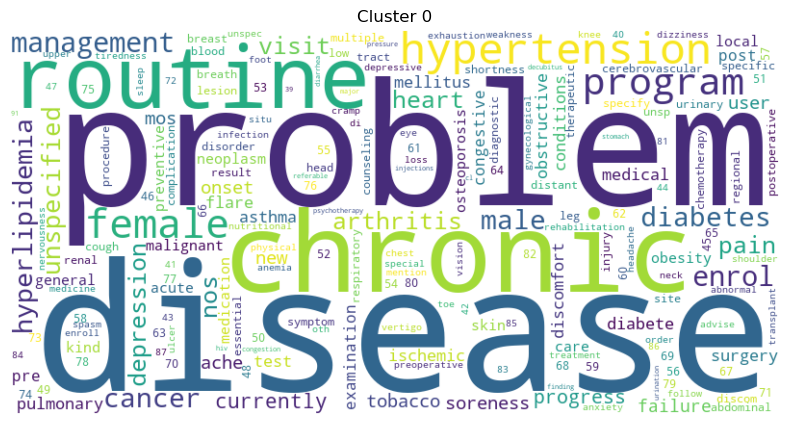

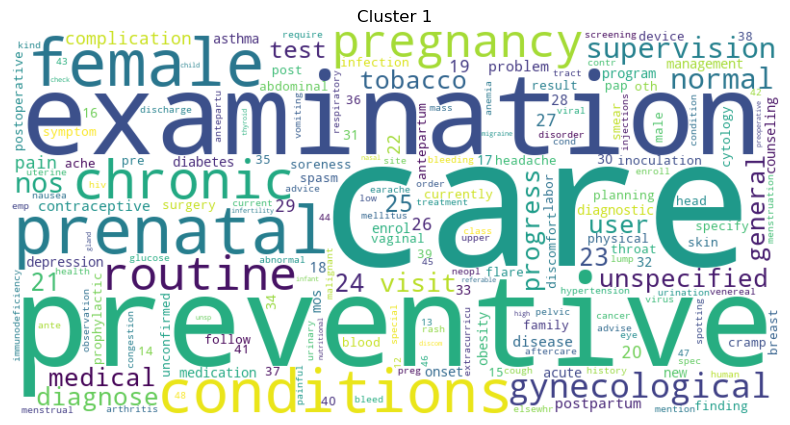

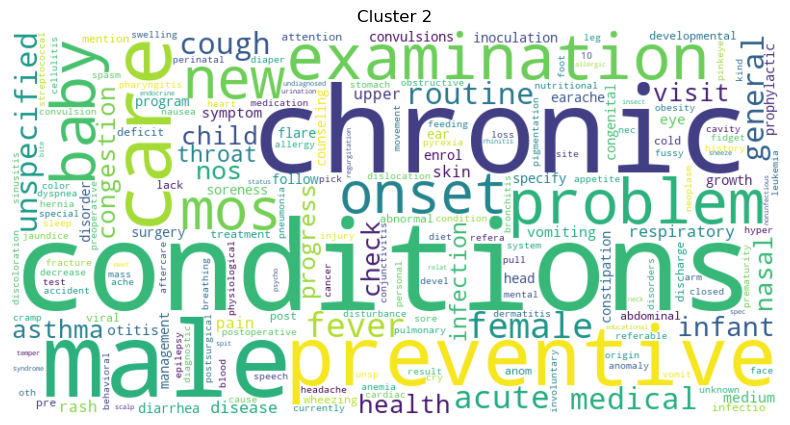

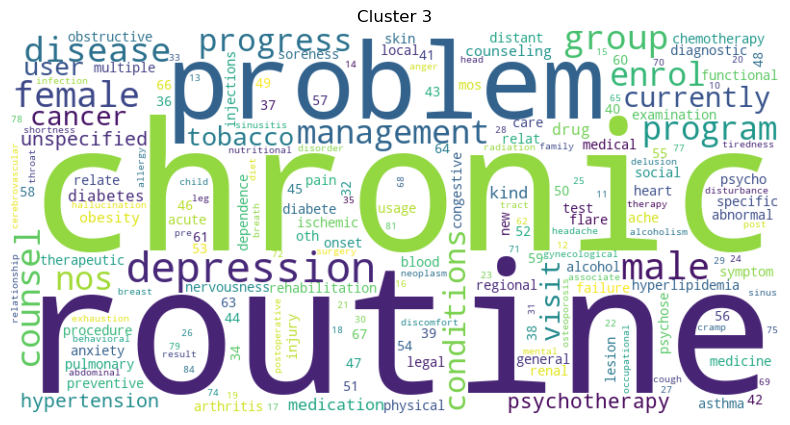

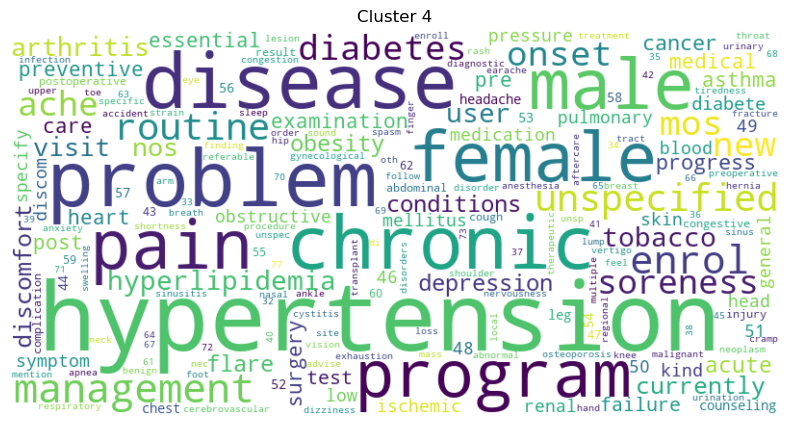

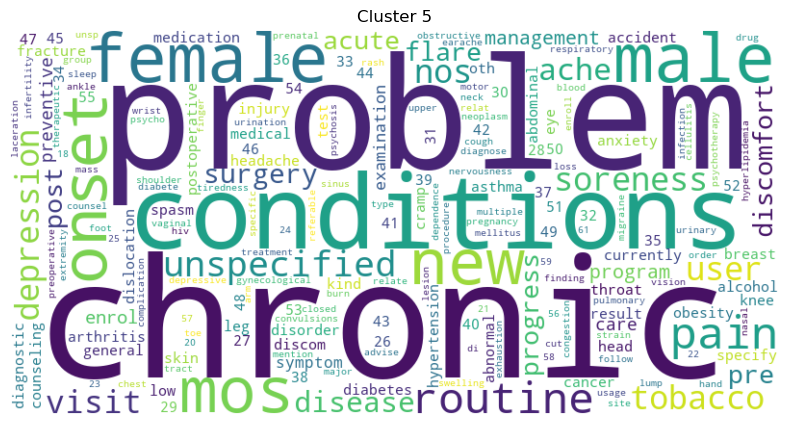

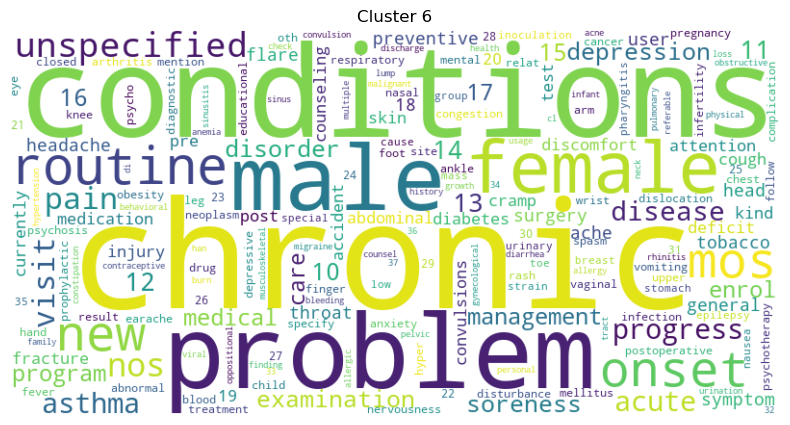

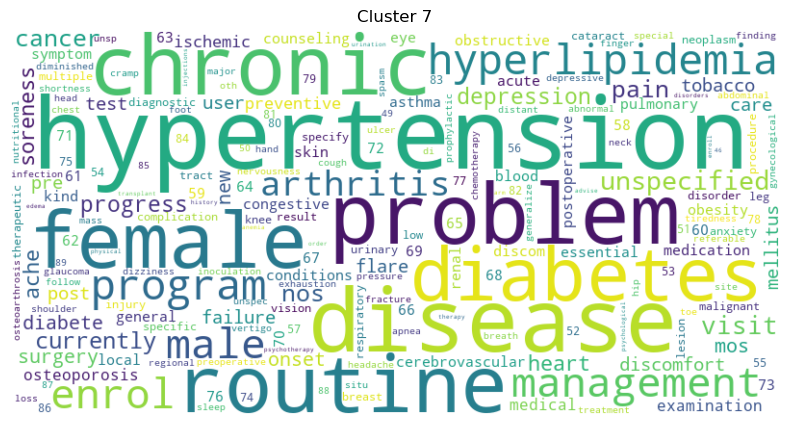

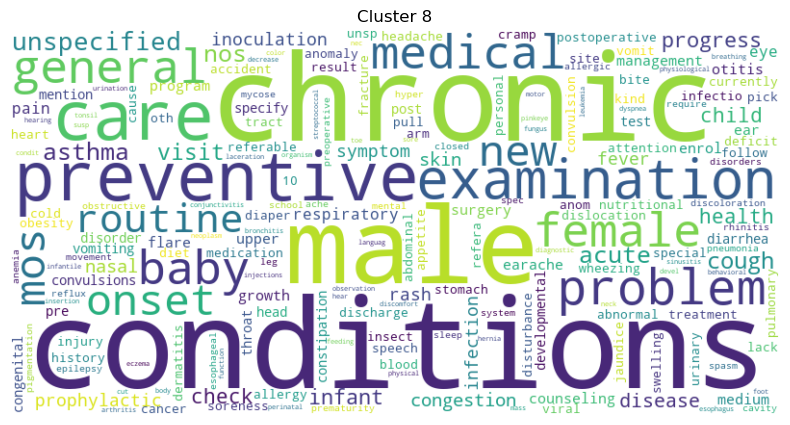

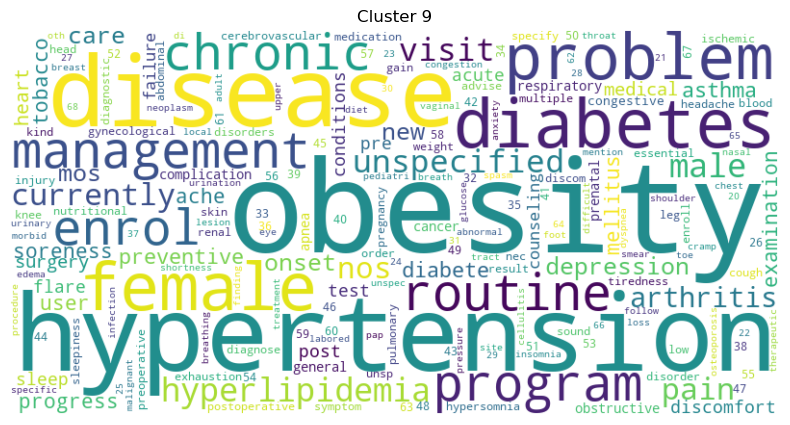

In [43]:
# Plot the word cloud for each cluster basd on the average TF-IDF
for i in range(n_clusters):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(cluster_tfidf.loc[i])
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Cluster {i}')
    plt.show()

## 6 - Topic Modeling

### 6.1 - Topic modeling using LDA

In [44]:
from spacy_transformers import Transformer